In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import cv2
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [0]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [0]:
from google.colab  import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/THI'

In [0]:
test1 = cv2.imread(path + '/folder_cau4/phamhuong.jpg')
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

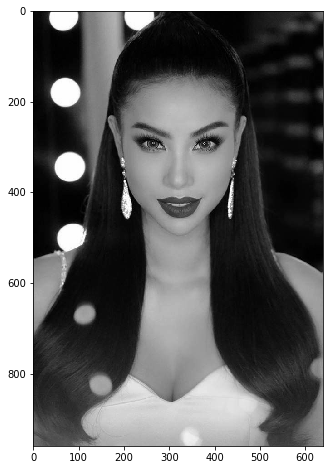

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(gray_img, cmap='gray')

In [0]:
# Try with just detecting face:

haar_face_cascade = cv2.CascadeClassifier(path + '/folder_cau4/haarcascade_frontalface_default.xml')

In [0]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

In [0]:
faces

array([[154, 157, 343, 343]], dtype=int32)

In [0]:
print('Faces found: ', len(faces))

Faces found:  1


In [0]:
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

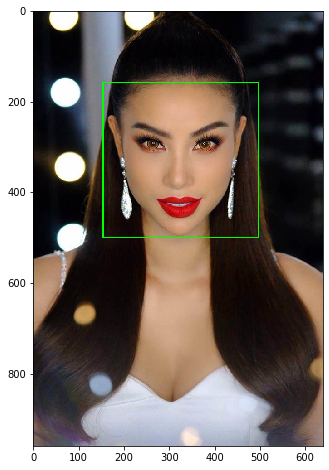

In [0]:
plt.figure(figsize=((8,8)))
plt.imshow(convertToRGB(test1))

In [0]:
# When we try with face having glass that leads to be wrong for detection

In [0]:
test2 = cv2.imread(path + '/folder_cau4/glasses2.jpg')
gray_img = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)

In [0]:
haar_face_cascade = cv2.CascadeClassifier(path + '/folder_cau4/haarcascade_frontalface_default.xml')

In [0]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

In [0]:
for (x, y, w, h) in faces:
    cv2.rectangle(test2, (x, y), (x+w, y+h), (0, 255, 0), 2)

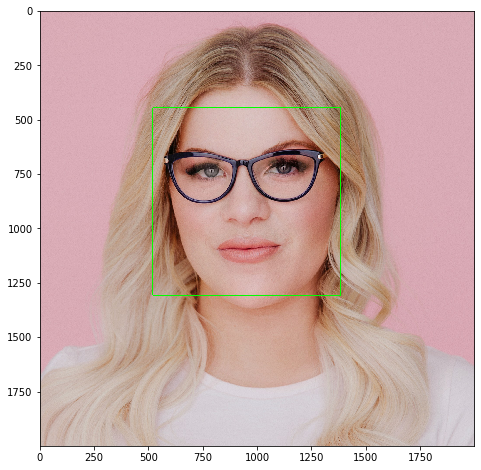

In [0]:
plt.figure(figsize=((8,8)))
plt.imshow(convertToRGB(test2))

In [0]:
def detect_face_with_glass(f_cascade, g_cascade, img, scaleFactor = 1.1):
  img_copy = img.copy()

  gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

  faces = f_cascade.detectMultiScale(gray, scaleFactor = scaleFactor, minNeighbors=5)
  faces_found = len(faces)

  for (x,y,w,h) in faces:
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 3)

    eye_gray = gray[y:y+h, x:x+w]
    eye_color = img_copy[y:y+h, x:x+w]

    eyes = g_cascade.detectMultiScale(eye_gray)
    print(len(eyes))
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(eye_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 3)
  
  return img_copy, faces_found

In [0]:
haar_eye_glass_cascade = cv2.CascadeClassifier(path + '/folder_cau4/haarcascade_eye_tree_eyeglasses.xml')

In [0]:
faces_detected_img, faces_found = detect_face_with_glass(haar_face_cascade, haar_eye_glass_cascade, test2)

2


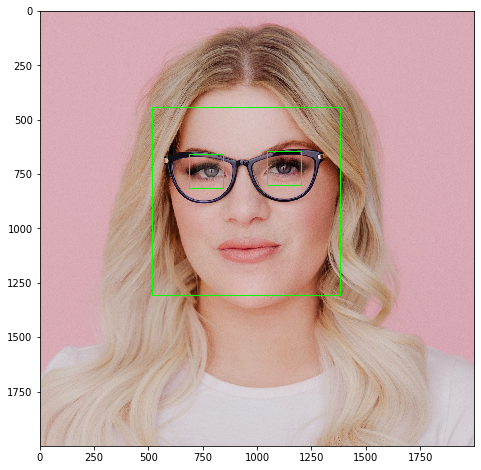

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(convertToRGB(faces_detected_img))

In [0]:
faces_found

1

In [0]:
faces_detected_img, faces_found = detect_face_with_glass(haar_face_cascade, haar_eye_glass_cascade, test1)

2


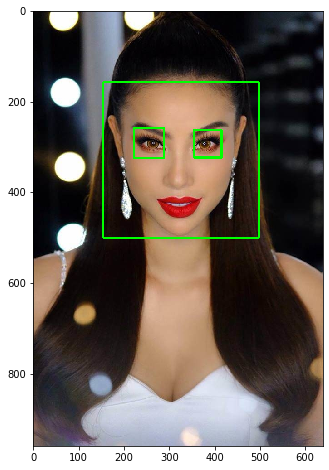

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(convertToRGB(faces_detected_img))

In [0]:
test4 = cv2.imread(path + '/folder_cau4/glasses_man.png')
gray_img = cv2.cvtColor(test4, cv2.COLOR_BGR2GRAY)

In [0]:
faces_detected_img, faces_found = detect_face_with_glass(haar_face_cascade, haar_eye_glass_cascade, test4)

2


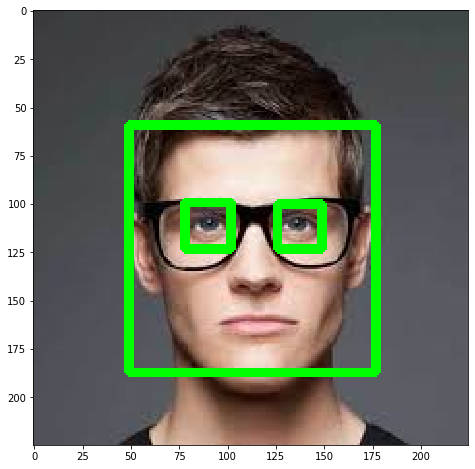

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(convertToRGB(faces_detected_img))

In [0]:
# With smile and glasses:

In [0]:
haar_smile_cascade = cv2.CascadeClassifier(path + '/folder_cau4/haarcascade_smile.xml')

In [0]:
test3 = cv2.imread(path + '/folder_cau4/lech1.png')
gray_img = cv2.cvtColor(test3, cv2.COLOR_BGR2GRAY)

In [0]:
faces_detected_img, faces_found = detect_face_with_glass(haar_face_cascade, haar_eye_glass_cascade, test3)

2


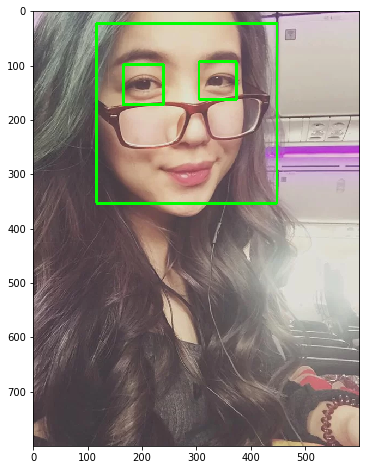

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(convertToRGB(faces_detected_img))

In [0]:
test4 = cv2.imread(path + '/folder_cau4/many1.jpg')
gray_img = cv2.cvtColor(test4, cv2.COLOR_BGR2GRAY)

In [0]:
faces_detected_img, faces_found = detect_face_with_glass(haar_face_cascade, haar_eye_glass_cascade, test4)

0
2
2
2
2
0
0
0
2


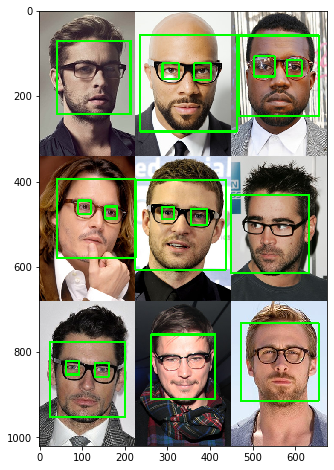

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(convertToRGB(faces_detected_img))